In [5]:
import pandas
import time
import github
import gpt
import Score

In [6]:
def run_experiment(csvFile):
    for i in range(0, len(csvFile)):
        repo_identifier = csvFile.iloc[i]['GitHub_Repo_Link'].split('github.com/')[1]
        print(repo_identifier)
        try:
            default_branch = github.get_default_branch(repo_identifier);
            repo_structure = github.get_repository_tree(repo_identifier, default_branch)
            dependencies = github.get_list_of_dependencies(repo_identifier)
            build_file_content = csvFile.iloc[i]['GitHub_Build_Pipeline_File_Content']
            repo_language = csvFile.iloc[i]['Language']

            generated_workflow_file = gpt.generate_build_pipeline(repo_structure, dependencies, default_branch)

            csvFile.loc[i,'Generated_Build_Pipeline_File_Content'] = generated_workflow_file
            valid_syntax = github.run_action_lint(generated_workflow_file);
            if not valid_syntax:
                csvFile.loc[i,'Syntax_Check'] = 'Invalid'
                continue

            csvFile.loc[i,'Syntax_Check'] = 'Valid'
            
            exact_match_score = Score.get_exact_match_score(generated_workflow_file, build_file_content)
            bleu_score = Score.get_bleu_score(generated_workflow_file, build_file_content)
            devops_aware_score = Score.get_devops_aware_score(generated_workflow_file, build_file_content, repo_language)

            csvFile.loc[i,'Exact_Match_Score'] = exact_match_score
            csvFile.loc[i,'BLEU_Score'] = bleu_score
            csvFile.loc[i,'DevOps_Aware_Score'] = devops_aware_score
            # Add delay to avoid rate limiting
            #time.sleep(5)
        except Exception as e:
            print(e)
            continue

    csvFile.to_csv('dataset/output.csv', index=False)

In [7]:
# reading the CSV file
csvFile = pandas.read_csv('dataset/dataset_test.csv')

# Pre-processing the CSV file
csvFile = csvFile[csvFile['GitHub_Repo_Link'].notna()]

# Explicitly specify dtypes to avoid pandas inferring dtypes
csvFile = csvFile.astype({'GitHub_Repo_Link': 'string', 'GitHub_Build_Pipeline_File_Content': 'string', 'Generated_Build_Pipeline_File_Content': 'string', 'Syntax_Check': 'string', 'Exact_Match_Score': 'float', 'BLEU_Score': 'float', 'DevOps_Aware_Score': 'float'})

csvFile

,Index,GitHub_Repo_Link,GitHub_Build_Pipeline_File_Content,Generated_Build_Pipeline_File_Content,Exact_Match_Score,BLEU_Score,Syntax_Check,DevOps_Aware_Score
0,1.0,https://github.com/DapperLib/Dapper,name: Main Build on: pull_request: push: ...,<NA>,NaN,NaN,<NA>,NaN
1,2.0,https://github.com/huiyadanli/RevokeMsgPatcher,name: .Net Build on: workflow_dispatch: ...,<NA>,NaN,NaN,<NA>,NaN
2,3.0,https://github.com/jasontaylordev/CleanArchite...,name: Build on: pull_request: branches:...,<NA>,NaN,NaN,<NA>,NaN
3,4.0,https://github.com/nilaoda/N_m3u8DL-CLI,name: Build_Latest on: [push] jobs: buil...,<NA>,NaN,NaN,<NA>,NaN
4,5.0,https://github.com/shadowsocks/shadowsocks-win...,name: Build on: push: branches-ignore: ...,<NA>,NaN,NaN,<NA>,NaN
5,NaN,https://github.com/ShareX/ShareX,name: Build ShareX on: push: branches: ...,<NA>,NaN,NaN,<NA>,NaN
6,NaN,https://github.com/DapperLib/Dapper,name: Main Build on: pull_request: push: ...,<NA>,NaN,NaN,<NA>,NaN
7,NaN,https://github.com/aalhour/C-Sharp-Algorithms,name: Build and Test on: [push] jobs: buil...,<NA>,NaN,NaN,<NA>,NaN
8,NaN,https://github.com/Cysharp/UniTask,name: build-release on: workflow_dispatch: ...,<NA>,NaN,NaN,<NA>,NaN
9,NaN,https://github.com/EduardoPires/EquinoxProject,name: .NET Core on: push: branches: [ m...,<NA>,NaN,NaN,<NA>,NaN


In [8]:
run_experiment(csvFile)

DapperLib/Dapper
huiyadanli/RevokeMsgPatcher
jasontaylordev/CleanArchitecture
nilaoda/N_m3u8DL-CLI


KeyboardInterrupt: 

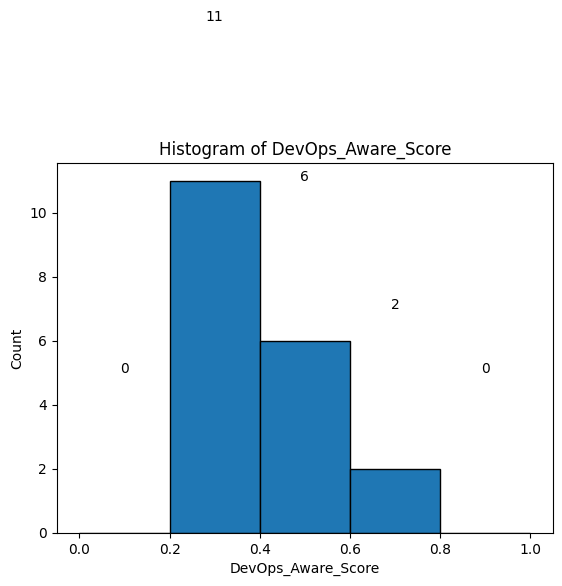

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file
df = pd.read_csv('dataset/output.csv')

# filter out rows with empty DevOps_Aware_Score
df = df[df['DevOps_Aware_Score'].notna()]

# create histogram
plt.hist(df['DevOps_Aware_Score'], bins=5, range=(0, 1), edgecolor='black')

# set labels and title
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')

# show count on top of each histogram
for i in range(5):
    count = len(df[(df['DevOps_Aware_Score'] >= i*0.2) & (df['DevOps_Aware_Score'] < (i+1)*0.2)])
    plt.text(i*0.2+0.1, count+5, str(count), ha='center')

# show the plot
plt.show()
